In [97]:
# Read in CSV files

import pandas as pd
import itertools

agg_results = pd.read_csv('aggregated_results.csv')
gene_essentiality = pd.read_csv('CRISPRGeneEffect.csv')
model_id = pd.read_csv('Model.csv')

In [98]:
ecDNA_ids = set(agg_results.groupby("Sample name").apply(lambda group: (group["Classification"] == "ecDNA").any()).loc[lambda x: x].index)
non_ecDNA_ids = set(agg_results.groupby('Sample name').apply(lambda group: not (group["Classification"] == "ecDNA").any()).loc[lambda x: x].index)

C:\Users\josep\AppData\Local\Temp\ipykernel_26144\3815557476.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ecDNA_ids = set(agg_results.groupby("Sample name").apply(lambda group: (group["Classification"] == "ecDNA").any()).loc[lambda x: x].index)
C:\Users\josep\AppData\Local\Temp\ipykernel_26144\3815557476.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  non_ecDNA_ids = set(agg_results.groupby('Samp

In [99]:
only_ecDNA = agg_results[agg_results['Sample name'].isin(ecDNA_ids)]
only_non_ecDNA = agg_results[agg_results['Sample name'].isin(non_ecDNA_ids)]

In [100]:
import ast
ec_dna_genes = only_ecDNA['All genes'].tolist()
ec_dna_genes = [ast.literal_eval(g) for g in ec_dna_genes]
ec_dna_genes = [item for sublist in ec_dna_genes for item in sublist]
ec_dna_genes = set(ec_dna_genes)

non_ec_dna_genes = only_non_ecDNA['All genes'].tolist()
non_ec_dna_genes = [ast.literal_eval(g) for g in non_ec_dna_genes]
non_ec_dna_genes = [item for sublist in non_ec_dna_genes for item in sublist]
non_ec_dna_genes = set(non_ec_dna_genes)


In [101]:
# We replace the cell line names in CRISPRGeneEffect.csv with the corresponding CCLE names from Models.csv

for index, row in gene_essentiality.iterrows():
    id = row['Unnamed: 0']
    name = model_id.loc[model_id["ModelID"] == id, "CCLEName"].values[0]
    gene_essentiality.at[index, 'Unnamed: 0'] = name

# We rename columns to only include the gene names (no integers or parentheses, etc.)
def clean_column_names(df):
    df.columns = df.columns.str.replace(r'\(\d+\)', '', regex=True)  # Remove integers within parentheses
    df.columns = df.columns.str.replace(r'\(\)', '', regex=True)     # Remove empty parentheses, if any
    df.columns = df.columns.str.strip()                              # Remove leading/trailing whitespaces
    return df

gene_essentiality = clean_column_names(gene_essentiality)

In [102]:
gene_essentiality

,Unnamed: 0,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
0,NIHOVCAR3_OVARY,-0.122637,0.025881,0.034217,-0.128082,-0.031285,0.338046,-0.006439,-0.093642,0.189186,...,-0.131727,-0.039829,0.179405,0.283552,0.204513,-0.289724,-0.062972,0.074180,0.111244,-0.467908
1,HEL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,0.019756,-0.083640,-0.060118,-0.027417,-0.036116,-0.001056,0.312876,-0.086897,0.204434,...,-0.170329,-0.454263,0.194583,0.098989,0.126948,0.032983,-0.410392,0.113156,0.234388,-0.088306
2,HEL9217_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,-0.107208,-0.023211,0.200204,0.116039,-0.172227,-0.071294,0.203270,-0.127806,-0.090981,...,-0.301695,-0.454969,-0.061959,-0.036427,0.016602,-0.201273,-0.178877,-0.055349,-0.002161,-0.186842
3,LS513_LARGE_INTESTINE,-0.031027,-0.137850,0.067704,0.107988,0.007992,0.124945,0.049548,-0.220824,-0.165669,...,-0.303390,-0.507272,-0.025400,0.236659,0.072010,-0.100344,-0.462160,-0.001555,-0.325964,-0.486660
4,C2BBE1_LARGE_INTESTINE,0.008888,-0.146566,0.084471,0.089419,0.065109,0.027841,0.087943,-0.161369,0.041121,...,-0.255466,-0.288739,-0.037132,0.261444,-0.062391,-0.112703,-0.598698,0.095877,-0.026742,-0.320759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,PSS131R_Osteosarcoma,-0.055721,-0.121228,0.072790,0.021916,-0.221940,0.071135,0.134854,-0.504790,0.058356,...,-0.104959,-0.559438,-0.062461,-0.058814,-0.076221,0.024959,0.015259,-0.306562,-0.148368,-0.579576
1096,YUHOIN0650_Melanoma_Skin,-0.009973,-0.119813,0.044097,0.041358,-0.146565,0.160566,0.134247,-0.242759,-0.085035,...,-0.314751,-0.903238,0.104278,0.101270,0.026373,-0.119911,-0.289412,-0.195097,-0.206400,-0.486525
1097,SKNMM_BRAIN_BONE,-0.025991,-0.007706,-0.038468,0.236576,-0.239690,0.061611,0.128461,-0.498119,0.022097,...,-0.164150,-0.743401,-0.023401,0.174912,-0.230089,-0.079342,-0.347484,-0.085302,-0.095965,-0.346272
1098,NaN,-0.127639,-0.040705,0.134556,-0.047984,-0.116114,0.213144,0.198647,-0.183355,-0.004409,...,-0.275523,-0.898982,-0.050201,0.125480,-0.189114,-0.043555,-0.335270,-0.208063,-0.094741,-0.222404


In [104]:
ecDNA_dict = {}

for gene in ec_dna_genes:
    if gene not in gene_essentiality.columns:
        continue
    if gene not in ecDNA_dict:
        ecDNA_dict[gene] = []
    for id in ecDNA_ids:
        if id not in gene_essentiality['Unnamed: 0'].values:
            continue
        val = gene_essentiality.loc[gene_essentiality['Unnamed: 0'] == id][gene].values[0]
        if val is None:
            continue
        ecDNA_dict[gene].append(val)
    

In [123]:
df_ecDNA = pd.DataFrame.from_dict(ecDNA_dict)
df_ecDNA

,EBAG9,BCL2L2,MMP24OS,TRIM54,PLD1,FBXL3,TTLL6,SCGB3A1,SPAG8,GHRL,...,CHST8,ENDOU,SLC22A12,RPS6KA4,MS4A4E,SNAP29,TPI1,CAPN12,CCNE2,HIF1A
0,0.076010,-0.122695,NaN,-0.127302,0.017892,0.044572,-0.095579,0.084518,-0.230634,0.133008,...,0.030871,-0.100210,-0.119956,-0.067894,NaN,-0.226231,-0.484225,-0.095070,-0.016054,0.114627
1,0.148881,-0.119931,NaN,-0.275846,0.011127,0.050168,-0.005843,0.099100,-0.226108,0.149122,...,-0.097843,0.006659,-0.160089,-0.266202,NaN,-0.276693,-0.636857,-0.131827,0.031711,0.233550
2,0.087196,-0.119172,NaN,-0.201148,-0.060723,-0.069570,-0.153206,0.118463,-0.052116,0.080265,...,-0.243874,0.015469,-0.045290,-0.092638,NaN,-0.245340,-0.784672,0.044693,0.097882,0.180686
3,-0.005969,-0.077015,NaN,-0.152248,-0.076682,-0.005138,-0.069519,0.196061,-0.199720,0.173047,...,0.275377,0.064393,-0.194284,-0.309924,NaN,-0.301030,-1.039308,0.059730,0.032498,0.149345
4,0.053029,-0.145573,NaN,-0.399213,-0.016646,0.061105,0.004552,0.222436,-0.148076,0.088782,...,0.074583,0.089898,-0.126988,-0.221992,NaN,-0.141906,-1.010015,0.046117,0.040396,0.264017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,0.128342,-0.200995,NaN,-0.453196,-0.167934,0.105443,-0.103551,0.390546,-0.301216,0.203019,...,-0.129481,-0.049133,-0.095689,-0.153295,NaN,0.030317,-0.403298,0.129813,-0.354077,0.226722
115,0.088452,0.024429,NaN,-0.218012,0.068444,-0.008072,-0.046690,0.034760,-0.023381,0.258581,...,-0.247882,0.027606,0.020168,0.118549,NaN,-0.058941,-0.292362,-0.181277,-0.169937,0.172347
116,-0.011993,-0.039111,NaN,0.207602,-0.141611,-0.066457,-0.157647,-0.225960,0.065840,0.066473,...,-0.307163,0.048116,-0.006107,-0.138493,NaN,-0.510178,-0.466978,-0.087401,-0.125189,0.087265
117,0.003988,-0.037911,NaN,-0.094915,0.074578,0.040552,-0.065278,0.062668,-0.165382,0.189255,...,-0.286788,0.001140,-0.155504,-0.210219,NaN,-0.410093,-0.437318,0.011088,0.087238,0.127228


In [106]:
non_ecDNA_dict = {}

for gene in non_ec_dna_genes:
    if gene not in gene_essentiality.columns:
        continue
    if gene not in non_ecDNA_dict:
        non_ecDNA_dict[gene] = []
    for id in non_ecDNA_ids:
        if id not in gene_essentiality['Unnamed: 0'].values:
            continue
        val = gene_essentiality.loc[gene_essentiality['Unnamed: 0'] == id][gene].values[0]
        if val is None:
            continue
        non_ecDNA_dict[gene].append(val)
    

In [109]:
df_non_ecDNA = pd.DataFrame.from_dict(non_ecDNA_dict)

In [111]:
df_non_ecDNA

,BCL2L2,ZNF793,PPP1R16B,SUGP2,MCF2L2,ZDHHC24,SLC1A1,DNAJA2,TPM4,BNIPL,...,MMP7,AHSG,NFKBIA,PUSL1,SNAP29,TSSK3,ZNF74,CAPN12,BMP8B,SLC6A9
0,-0.126070,-0.081868,0.021101,-0.164679,0.106982,-0.134083,0.015338,-0.060421,0.043513,-0.164610,...,0.009128,0.099572,-0.235678,-0.141299,-0.173567,-0.098539,0.093310,-0.114401,-0.026365,-0.283904
1,-0.315662,-0.118182,-0.040043,-0.159489,0.033709,-0.101669,0.018866,0.005883,0.006121,-0.041727,...,-0.080365,0.122219,-0.010062,-0.162912,-0.364465,-0.244746,0.001944,-0.045512,-0.146976,-0.255737
2,-0.049229,0.000699,0.048560,-0.382512,-0.100550,-0.141445,0.051701,0.176717,-0.380616,-0.197175,...,0.124631,0.129209,0.055331,-0.091419,-0.464413,-0.188146,-0.058009,0.014054,-0.762451,-0.549407
3,-0.039253,0.034435,0.168551,-0.334065,0.028171,-0.062399,0.069457,-0.345332,0.171588,-0.217902,...,0.025697,-0.052799,-0.133233,-0.011858,-0.447382,-0.192724,-0.010459,-0.084893,-0.168307,-0.446560
4,-0.096794,0.057699,0.122828,-0.318032,0.059423,-0.232022,-0.071511,0.024619,-0.035173,-0.256170,...,-0.061164,-0.099221,-0.187532,-0.119015,-0.426264,-0.230396,-0.229014,-0.014191,-0.082253,-0.106364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,-0.044488,-0.086917,-0.112136,-0.336309,0.166237,-0.095577,0.088451,0.113787,-0.269274,-0.213087,...,-0.018550,0.015181,0.019601,-0.089281,-0.248083,-0.120502,0.075556,0.026573,-0.291184,-0.281993
119,-0.277465,0.032197,-0.054361,-0.252959,0.122451,-0.130636,-0.037250,-0.079512,0.128209,-0.258616,...,0.038895,0.058295,0.098706,-0.144777,-0.155433,-0.667345,0.010170,0.007716,-0.376484,-0.303778
120,-0.160167,-0.093094,0.032462,-0.084655,-0.088728,-0.073567,0.066382,-0.002363,-0.098140,-0.219464,...,0.003688,0.048660,0.010327,0.016189,-0.398469,-0.150954,-0.005808,0.036080,-0.253814,-0.307586
121,-0.020656,-0.062528,-0.398710,-0.001925,-0.266449,-0.498484,0.152977,-0.084106,0.272808,-0.388125,...,-0.085935,-0.102410,-0.061375,0.121182,-0.442815,-0.125164,0.197232,-0.229653,-0.373073,-0.448924


In [142]:
df1_prefixed = df_ecDNA.add_prefix('ecDNA_')
df2_prefixed = df_non_ecDNA.add_prefix('non-ecDNA_')

combined_df = pd.concat([df1_prefixed, df2_prefixed], axis=1, join='inner')
combined_df.reset_index(drop=True, inplace=True)


In [158]:
combined_df

,ecDNA_EBAG9,ecDNA_BCL2L2,ecDNA_MMP24OS,ecDNA_TRIM54,ecDNA_PLD1,ecDNA_FBXL3,ecDNA_TTLL6,ecDNA_SCGB3A1,ecDNA_SPAG8,ecDNA_GHRL,...,non-ecDNA_MMP7,non-ecDNA_AHSG,non-ecDNA_NFKBIA,non-ecDNA_PUSL1,non-ecDNA_SNAP29,non-ecDNA_TSSK3,non-ecDNA_ZNF74,non-ecDNA_CAPN12,non-ecDNA_BMP8B,non-ecDNA_SLC6A9
0,0.076010,-0.122695,NaN,-0.127302,0.017892,0.044572,-0.095579,0.084518,-0.230634,0.133008,...,0.009128,0.099572,-0.235678,-0.141299,-0.173567,-0.098539,0.093310,-0.114401,-0.026365,-0.283904
1,0.148881,-0.119931,NaN,-0.275846,0.011127,0.050168,-0.005843,0.099100,-0.226108,0.149122,...,-0.080365,0.122219,-0.010062,-0.162912,-0.364465,-0.244746,0.001944,-0.045512,-0.146976,-0.255737
2,0.087196,-0.119172,NaN,-0.201148,-0.060723,-0.069570,-0.153206,0.118463,-0.052116,0.080265,...,0.124631,0.129209,0.055331,-0.091419,-0.464413,-0.188146,-0.058009,0.014054,-0.762451,-0.549407
3,-0.005969,-0.077015,NaN,-0.152248,-0.076682,-0.005138,-0.069519,0.196061,-0.199720,0.173047,...,0.025697,-0.052799,-0.133233,-0.011858,-0.447382,-0.192724,-0.010459,-0.084893,-0.168307,-0.446560
4,0.053029,-0.145573,NaN,-0.399213,-0.016646,0.061105,0.004552,0.222436,-0.148076,0.088782,...,-0.061164,-0.099221,-0.187532,-0.119015,-0.426264,-0.230396,-0.229014,-0.014191,-0.082253,-0.106364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,0.128342,-0.200995,NaN,-0.453196,-0.167934,0.105443,-0.103551,0.390546,-0.301216,0.203019,...,0.005185,-0.180417,0.082173,-0.207452,-0.137959,-0.288327,-0.052028,-0.004269,0.103312,-0.215197
115,0.088452,0.024429,NaN,-0.218012,0.068444,-0.008072,-0.046690,0.034760,-0.023381,0.258581,...,-0.181866,0.077192,-0.073929,-0.000305,-0.113061,-0.327360,-0.082614,-0.092857,NaN,-0.352535
116,-0.011993,-0.039111,NaN,0.207602,-0.141611,-0.066457,-0.157647,-0.225960,0.065840,0.066473,...,-0.080676,-0.151797,-0.149348,-0.073034,-0.229581,-0.253694,0.032237,0.040957,-0.177105,-0.387983
117,0.003988,-0.037911,NaN,-0.094915,0.074578,0.040552,-0.065278,0.062668,-0.165382,0.189255,...,0.066827,-0.043640,-0.135922,-0.149789,-0.408793,-0.401173,-0.076251,0.094055,-0.201675,-0.171642


In [159]:
common_genes = set(df_ecDNA.columns).intersection(df_non_ecDNA.columns)
common_genes = list(common_genes)

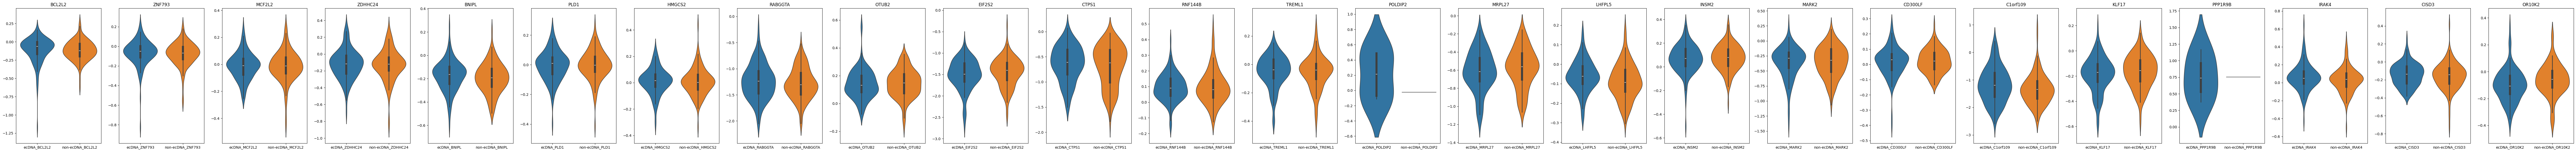

In [179]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


fig, axes = plt.subplots(nrows=1, ncols=len(common_genes[:25]), figsize=(4*len(common_genes[:25]), 6))

for i, gene in enumerate(common_genes[:25]):
    ax = axes[i]
    ecDNA_data = combined_df['ecDNA_' + gene]
    non_ecDNA_data = combined_df['non-ecDNA_' + gene]
    sns.violinplot(data=[ecDNA_data, non_ecDNA_data], ax=ax)
    ax.set_title(gene)

plt.tight_layout()
plt.show()

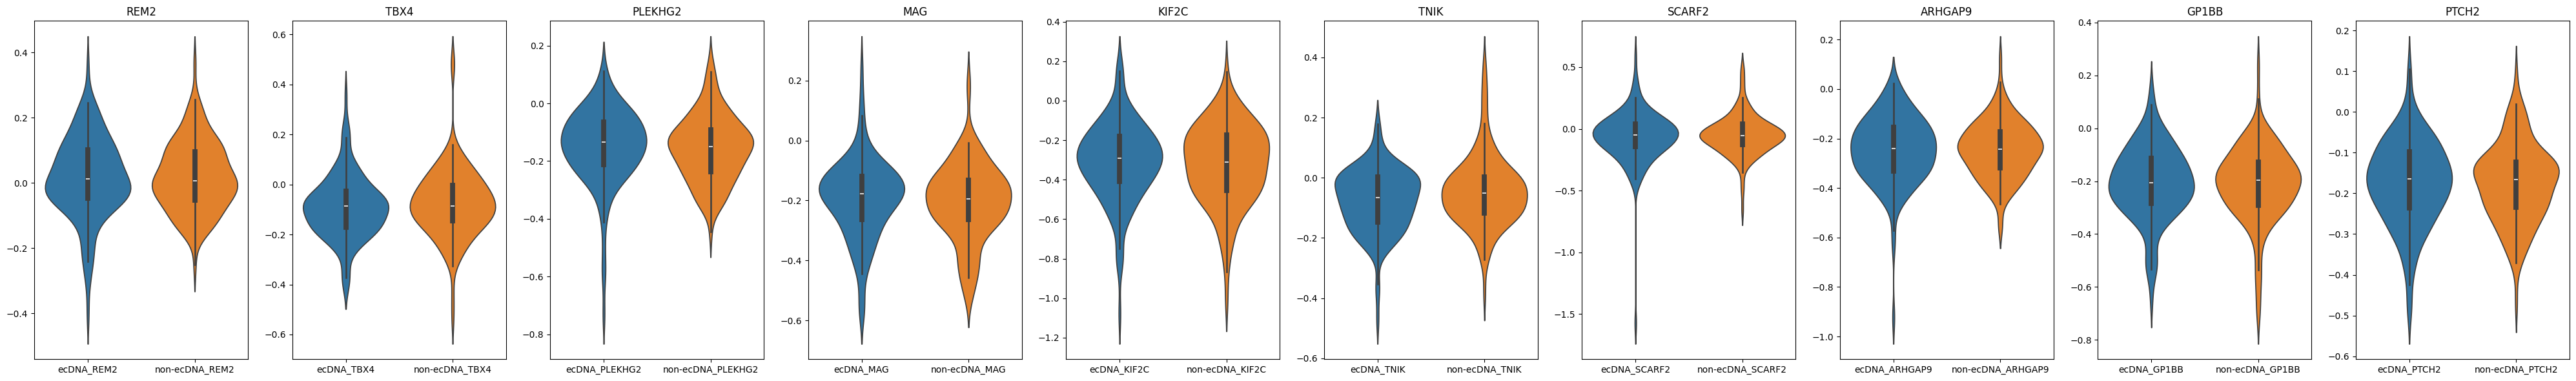

In [192]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
start = 510
end = 520

fig, axes = plt.subplots(nrows=1, ncols=len(common_genes[start:end]), figsize=(4*len(common_genes[start:end]), 6))

for i, gene in enumerate(common_genes[start:end]):
    ax = axes[i]
    ecDNA_data = combined_df['ecDNA_' + gene]
    non_ecDNA_data = combined_df['non-ecDNA_' + gene]
    sns.violinplot(data=[ecDNA_data, non_ecDNA_data], ax=ax)
    ax.set_title(gene)

plt.tight_layout()
plt.show()